In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import scipy

data_file_path = 'data_train.csv'
URM_all_dataframe = pd.read_csv(filepath_or_buffer=data_file_path,
                                sep=',',
                                engine='python')
URM_all_dataframe.columns = ['UserID', 'ItemID', 'Data']
URM_all_dataframe.head()


,UserID,ItemID,Data
0,1,7,1.0
1,1,15,1.0
2,1,16,1.0
3,1,133,1.0
4,1,161,1.0


In [2]:
print("Number of items\t {}, Number of users\t {}".format(len(URM_all_dataframe['ItemID'].unique()), len(URM_all_dataframe['UserID'].unique())))
print("Number of interactions\t {}".format(URM_all_dataframe['Data'].count()))
print("Max value of UserID\t {}, Max value of ItemID\t {}".format(URM_all_dataframe['UserID'].max(), URM_all_dataframe['ItemID'].max()))

Number of items	 22222, Number of users	 12638
Number of interactions	 478730
Max value of UserID	 13024, Max value of ItemID	 22347


In [3]:
mapped_id, original_id = pd.factorize(URM_all_dataframe['UserID'].unique())
user_original_ID_to_index = pd.Series(data=mapped_id, index=original_id)

mapped_id, original_id = pd.factorize(URM_all_dataframe['ItemID'].unique())
item_original_ID_to_index = pd.Series(data=mapped_id, index=original_id)

In [4]:
URM_all_dataframe['UserID'] = URM_all_dataframe['UserID'].map(user_original_ID_to_index)
URM_all_dataframe['ItemID'] = URM_all_dataframe['ItemID'].map(item_original_ID_to_index)

In [5]:
URM_all_dataframe.head()

,UserID,ItemID,Data
0,0,0,1.0
1,0,1,1.0
2,0,2,1.0
3,0,3,1.0
4,0,4,1.0
...,...,...,...
195,4,184,1.0
196,4,185,1.0
197,4,186,1.0
198,4,187,1.0


In [6]:
userID_unique = URM_all_dataframe['UserID'].unique()
itemID_unique = URM_all_dataframe['ItemID'].unique()

n_users = len(userID_unique)
n_items = len(itemID_unique)
n_interactions = len(URM_all_dataframe)

print("Number of items\t {}, Number of users\t {}".format(n_items, n_users))
print("Max value of UserID\t {}, Max value of ItemID\t {}".format(userID_unique.max(), itemID_unique.max()))
print("Number of interactions\t {}".format(n_interactions))

print("Average interactions per user {:.2f}\nAverage interactions per item {:.2f}".format(n_interactions/n_users, n_interactions/n_items))

print("Sparsity {:.5f} %".format((1 - n_interactions/(n_users*n_items))*100))

Number of items	 22222, Number of users	 12638
Max value of UserID	 12637, Max value of ItemID	 22221
Number of interactions	 478730
Average interactions per user 37.88
Average interactions per item 21.54
Sparsity 99.82954 %


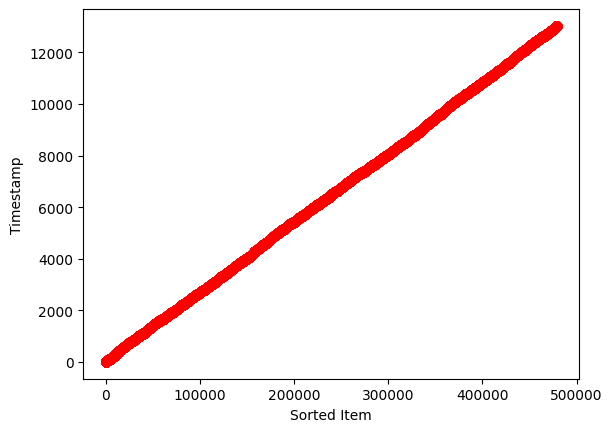

In [10]:
timestamp_sorted = URM_all_dataframe['UserID'].values.copy()
timestamp_sorted.sort()

pyplot.plot(timestamp_sorted, 'ro')
pyplot.ylabel('Timestamp')
pyplot.xlabel('Sorted Item')
pyplot.show()